In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.decomposition import PCA

In [4]:
df=pd.read_csv('features.tsv', sep='\t',header=None)

print(df)

print(df.info())

print(df.describe())



            0    1         2    3         4    5          6     7    8     9   \
0            1  0.0 -2.031432  0.0 -1.406914  0.0  15.250000   0.0  0.0   1.0   
1            2  0.0 -1.205042  0.0 -0.643077  0.0  22.285714   7.0  0.0  13.0   
2            3  0.0 -1.562313  0.0 -1.100832  0.0  25.041667   4.0  0.0   9.0   
3            4  0.0 -1.625186  0.0 -1.183770  0.0  26.666667   2.0  0.0   2.0   
4            5  0.0 -2.014903  0.0 -1.386294  0.0  15.000000   0.0  0.0   1.0   
5            6  0.0 -1.704748  0.0 -0.980829  0.0  11.000000   0.0  0.0   0.0   
6            7  0.0 -2.072473  0.0 -1.457753  0.0  15.888889   1.0  0.0   3.0   
7            8  0.0 -1.172224  0.0 -0.597837  1.0  22.142857   2.0  0.0   3.0   
8            9  0.0 -0.969401  0.0 -0.286425  1.0  20.173913   1.0  0.0   6.0   
9           10  0.0 -1.390830  0.0 -0.832260  1.0  18.416667   1.0  0.0   1.0   
10          11  0.0 -1.157181  0.0 -0.591515  1.0  23.857143   2.0  0.0   3.0   
11          12  0.0 -1.42210

                  0              1              2         3              4   \
count  123516.000000  123516.000000  123516.000000  123516.0  123516.000000   
mean    61758.500000      -0.121217      -1.737732       0.0      -1.158161   
std     35656.142262       0.629986       0.480664       0.0       0.504136   
min         1.000000      -8.018735      -5.240991       0.0      -4.793292   
25%     30879.750000       0.000000      -2.014903       0.0      -1.489479   
50%     61758.500000       0.000000      -1.694891       0.0      -1.156695   
75%     92637.250000       0.000000      -1.402604       0.0      -0.816615   
max    123516.000000       0.000000       0.000000       0.0       2.021287   

                  5              6              7              8   \
count  123516.000000  123516.000000  123516.000000  123516.000000   
mean        0.496017      22.413974       0.767123       0.110973   
std         0.499986      11.431077       1.976823       2.427700   
min         

In [6]:
params = np.array(df.values[:,1:], dtype="float64")
params = scale(params)

In [7]:
X = PCA(n_components=2).fit_transform(params)
num = X.shape[0]
OUTLIER_FRACTION = 0.01

In [8]:
clf = svm.OneClassSVM(kernel="rbf")
clf.fit(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [9]:
dist_to_border = clf.decision_function(X).ravel()
threshold = stats.scoreatpercentile(dist_to_border,
            100 * OUTLIER_FRACTION)
is_inlier = dist_to_border > threshold

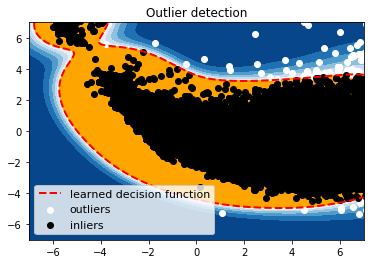

In [10]:
xx, yy = np.meshgrid(np.linspace(-7, 7, 500), np.linspace(-7, 7, 500))
n_inliers = int((1. - OUTLIER_FRACTION) * num)
n_outliers = int(OUTLIER_FRACTION * num)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Outlier detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],
                            linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
b = plt.scatter(X[is_inlier == 0, 0], X[is_inlier == 0, 1], c='white')
c = plt.scatter(X[is_inlier == 1, 0], X[is_inlier == 1, 1], c='black')
plt.axis('tight')
plt.legend([a.collections[0], b, c],
           ['learned decision function', 'outliers', 'inliers'],
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlim((-7, 7))
plt.ylim((-7, 7))
plt.show()

In [14]:
print(df[is_inlier == 0])

            0    1         2    3         4    5           6     7     8   \
58          59  0.0 -0.789130  0.0  0.024503  0.0   19.273148   9.0   1.0   
162        163  0.0 -0.690458  0.0  0.186864  1.0   22.107143  12.0   0.0   
269        270  0.0 -1.258330  0.0 -0.717743  0.0   22.850746   4.0   0.0   
1059      1060  0.0 -1.038729  0.0 -0.392139  0.0   20.284672  27.0   5.0   
1069      1070  0.0 -0.899205  0.0 -0.196099  0.0   22.604651   0.0   0.0   
1166      1167  0.0 -0.773999  0.0  0.012945  0.0   23.769231   0.0   0.0   
1168      1169  0.0 -0.834937  0.0 -0.068257  0.0   20.391304   0.0   0.0   
1200      1201  0.0 -0.794261  0.0 -0.015319  0.0   22.596154   0.0   0.0   
1443      1444  0.0 -0.891666  0.0 -0.213177  0.0   27.075000   6.0   1.0   
1860      1861  0.0 -1.067911  0.0 -0.405895  0.0   17.802752  11.0  13.0   
1886      1887  0.0 -0.879293  0.0 -0.123374  0.0   18.477679  11.0   0.0   
2158      2159  0.0 -0.680145  0.0  0.228341  0.0   19.882653   4.0   1.0   